In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split





In [50]:
df=pd.read_csv('titanic.csv')

In [51]:
# Check starting five rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#Check the shape of the Dataset
df.shape


(891, 12)

In [53]:
#EXPLORATORY DATA ANALYSIS

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
#Check the missing values in the dataset
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
def display_missing(df):
    for col in df.columns.tolist():          
            print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
display_missing(df)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


By calling this function with your DataFrame (df), it will print the number of missing values for each column in the DataFrame, helping you identify which columns have missing data. 
This is useful for data cleaning and imputation before performing any data analysis or modeling.

In [56]:
# Calculate the correlation matrix and convert it to absolute values
df_corr = df.corr().abs()

# Unstack the correlation matrix and sort the values in descending order
df_corr = df_corr.unstack().sort_values(ascending=False).reset_index()

# Rename the columns for better readability
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)

# Filter and display correlations involving the feature "Age"
df_corr[df_corr['Feature 1'] == 'Age']


,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
32,Age,Survived,0.077221
36,Age,PassengerId,0.036847


The code calculates the correlation matrix for the DataFrame df, and then it sorts the correlation coefficients in descending order to find the correlations between different features. 
Lastly, it filters and displays the correlation coefficients where "Age" is one of the features involved.

In [57]:
# Calculate the median age for each passenger class
median_age_by_pclass = df.groupby('Pclass')['Age'].median()

# Function to fill missing values in 'Age' based on passenger class
def fill_age_by_pclass(row):
    if pd.isnull(row['Age']):
        return median_age_by_pclass[row['Pclass']]
    else:
        return row['Age']

# Apply the function to fill missing values in 'Age' column
df['Age'] = df.apply(fill_age_by_pclass, axis=1)


In [58]:
# Calculate the median age for each combination of 'Sex' and 'Pclass'
age_by_pclass_sex = df.groupby(['Sex', 'Pclass']).median()['Age']

# Print the median age for each combination of 'Sex' and 'Pclass'
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))

# Print the overall median age for all passengers
print('Median age of all passengers: {}'.format(df['Age'].median()))

# Fill missing values in 'Age' with the medians of 'Sex' and 'Pclass' groups
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))



Median age of Pclass 1 female: 35.5
Median age of Pclass 1 male: 37.0
Median age of Pclass 2 female: 28.5
Median age of Pclass 2 male: 29.0
Median age of Pclass 3 female: 24.0
Median age of Pclass 3 male: 24.0
Median age of all passengers: 26.0


The code efficiently fills the missing values in the "Age" column by considering the median age of each combination of "Sex" and "Pclass" groups, resulting in a more accurate and meaningful imputation.

In [59]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


It appears that the two missing values in the "Embarked" column are for female passengers who are in the upper class (Pclass 1) and share the same ticket number. The fact that they have the same ticket number suggests that they likely know each other or are traveling together.
Given this information, it is logical to assume that these two passengers embarked from the same port. Since the mode "Embarked" value for upper class female passengers is "C" (Cherbourg), it is reasonable to use "C" as the imputed value for the missing "Embarked" values for these two passengers.



In [60]:
# Filling the missing values in Embarked with S
df['Embarked'] = df['Embarked'].fillna('S')

In [61]:
# Find the indices of the missing values in 'Embarked'
missing_embarked_indices = df[df['Embarked'].isnull()].index

# Impute the missing 'Embarked' values with 'C'
df.loc[missing_embarked_indices, 'Embarked'] = 'C'


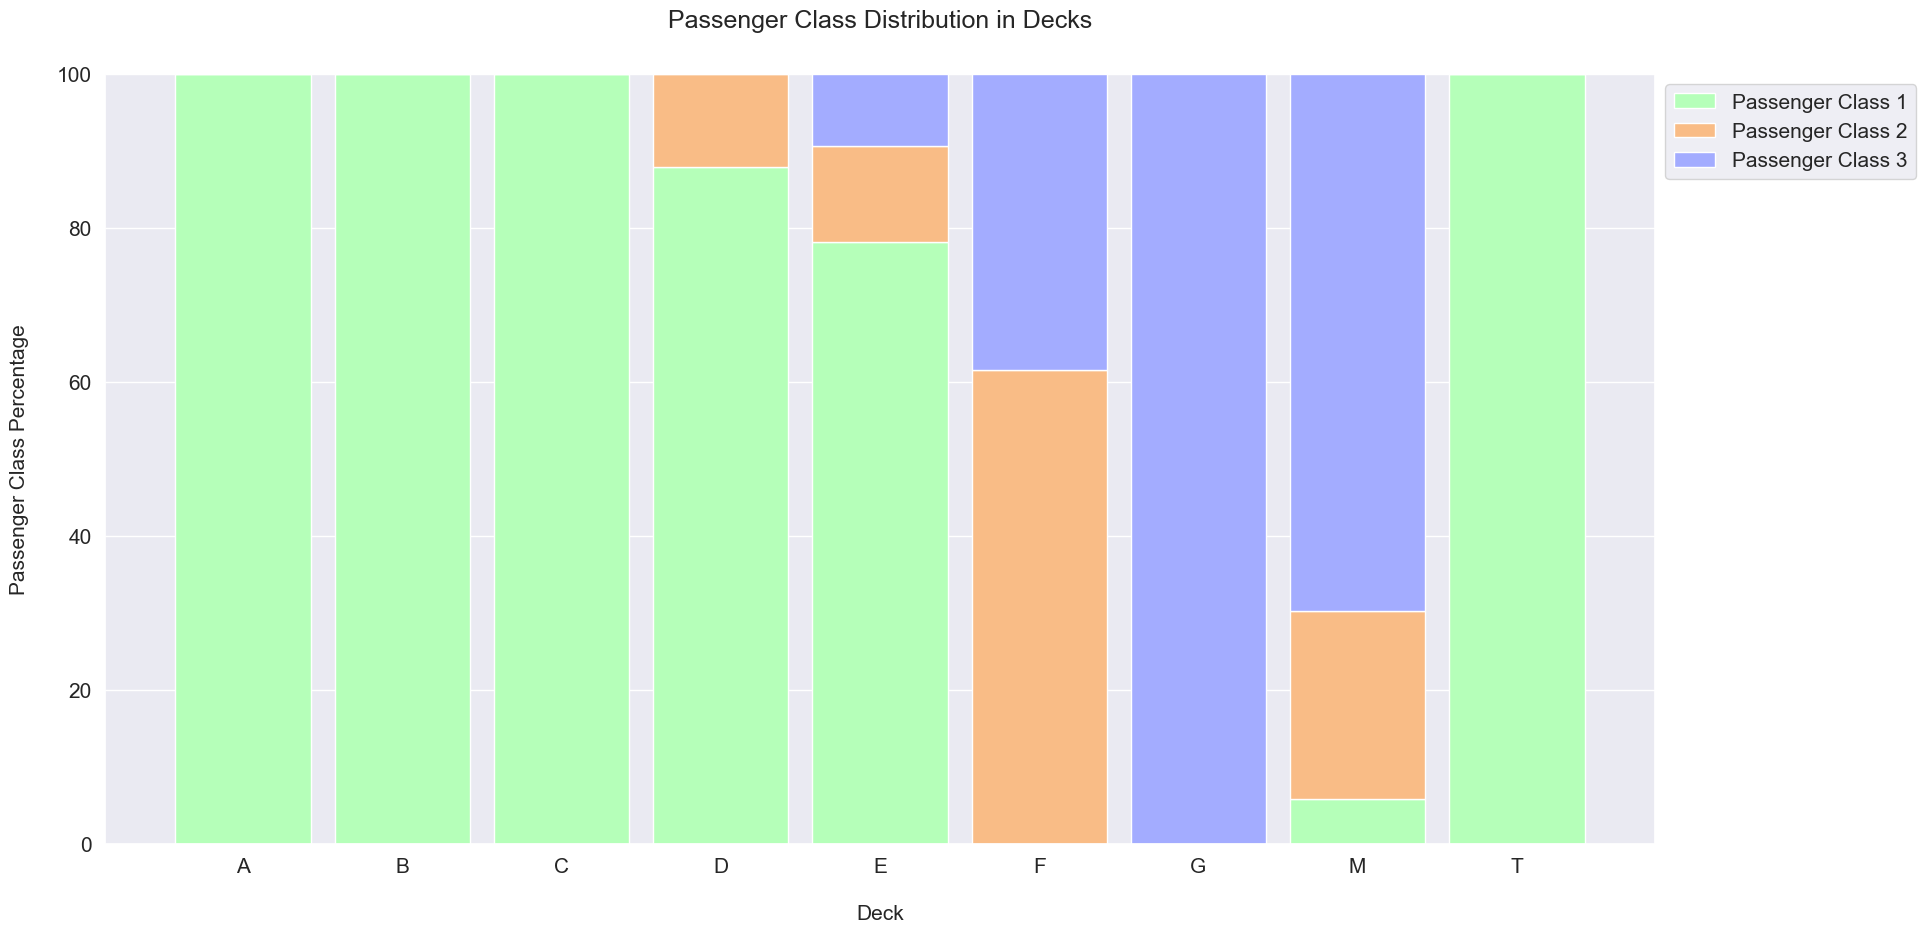

In [62]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_decks = df.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_decks)
display_pclass_dist(all_deck_per)

Decks A, B, and C exclusively accommodate 1st class passengers, with 100% of passengers on these decks belonging to the 1st class.

Deck D primarily consists of 1st class passengers (87%) and a smaller proportion of 2nd class passengers (13%).

Deck E is mainly occupied by 1st class passengers (83%), with a smaller representation of 2nd class passengers (10%) and a few 3rd class passengers (7%).

Deck F has a majority of 2nd class passengers (62%) and a significant portion of 3rd class passengers (38%).

Deck G is exclusively comprised of 3rd class passengers, with 100% of its passengers belonging to the 3rd class.

The boat deck (Deck T) accommodates only one passenger who is a 1st class passenger. Due to the resemblance of this passenger to those on Deck A, he is grouped with Deck A.

Passengers labeled as "M" represent missing values in the "Cabin" feature. As it is not possible to determine the real deck for these passengers, you have reasonably decided to use "M" as a distinct deck designation.

In [63]:
# Passenger in the T deck is changed to A
idx = df[df['Deck'] == 'T'].index
df.loc[idx, 'Deck'] = 'A'

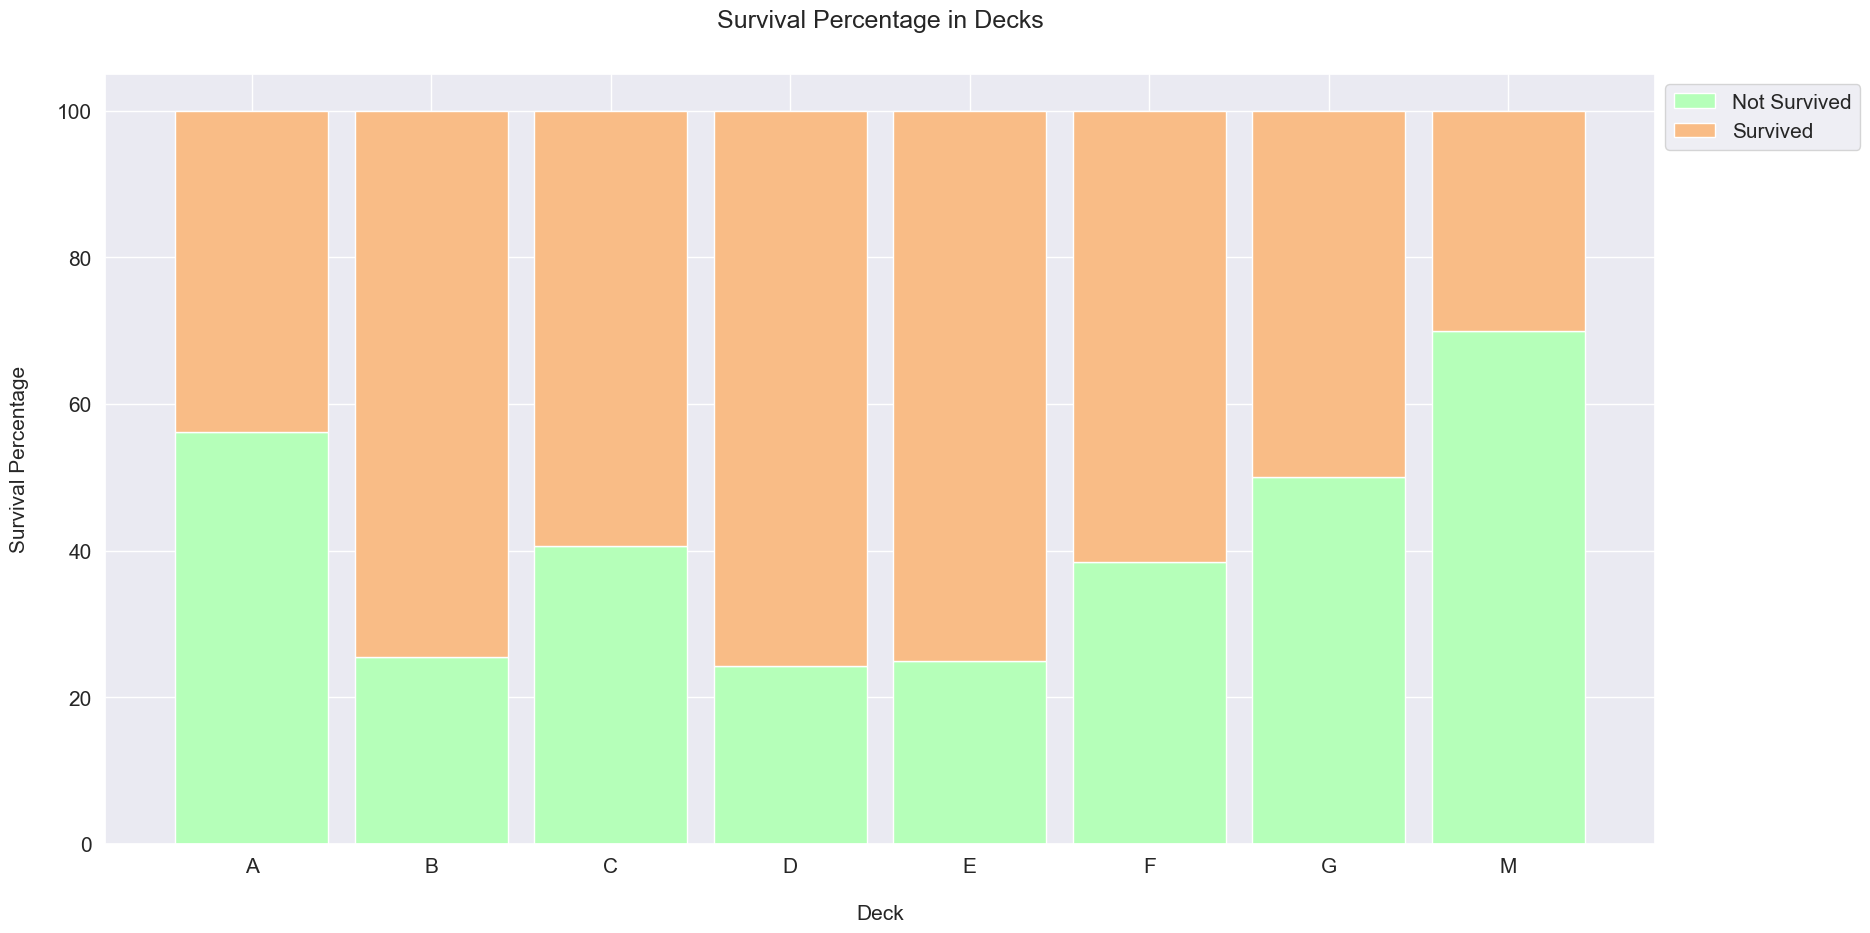

In [64]:
df_decks_survived = df.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_decks_survived)
display_surv_dist(all_surv_per)

Diverse Survival Rates: Each deck on the Titanic exhibits different survival rates, indicating that the deck location played a significant role in determining passenger outcomes.

Higher Survival Rates for 1st Class: Decks B, C, D, and E, which are predominantly occupied by 1st class passengers, have the highest survival rates. This suggests that the socio-economic status of passengers in these decks positively influenced their chances of survival.

Lowest Survival Rate for Missing Cabins (M): The M deck, representing missing cabin values, has the lowest survival rate. Your reasoning that this is likely due to the inability to retrieve cabin data for victims is valid, and you reasonably handled this unique group by labeling it as "M."

Grouping Similar Decks: To reduce the high cardinality of the "Deck" feature and make it more interpretable, you have grouped certain decks based on their similarities in passenger class distribution and survival rates. Decks A, B, and C are labeled as "ABC" due to their exclusive 1st class occupancy, and decks D and E are labeled as "DE" because of their similar characteristics. Likewise, decks F and G are grouped as "FG" for the same reasons.

Maintaining Uniqueness of M Deck: While grouping similar decks, you have retained the uniqueness of the M deck, as it differs significantly from others in terms of passenger class distribution and survival rates.










In [65]:
df['Deck'] = df['Deck'].replace(['A', 'B', 'C'], 'ABC')
df['Deck'] = df['Deck'].replace(['D', 'E'], 'DE')
df['Deck'] = df['Deck'].replace(['F', 'G'], 'FG')

df['Deck'].value_counts()

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64

By filling the missing values in the "Age", "Embarked", "Fare", and "Deck" features, and subsequently dropping the "Cabin" feature as it is no longer needed, we have effectively prepared a complete and clean dataset for further analysis and modeling.

In [66]:
# Dropping the Cabin feature
df.drop(['Cabin'], inplace=True, axis=1)

display_missing(df)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 0
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Embarked column missing values: 0
Deck column missing values: 0


In [67]:
#Target Distribution

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

342 of 891 passengers survived and it is the 38.38% of the dataset.
549 of 891 passengers didnt survive and it is the 61.62% of the dataset set.


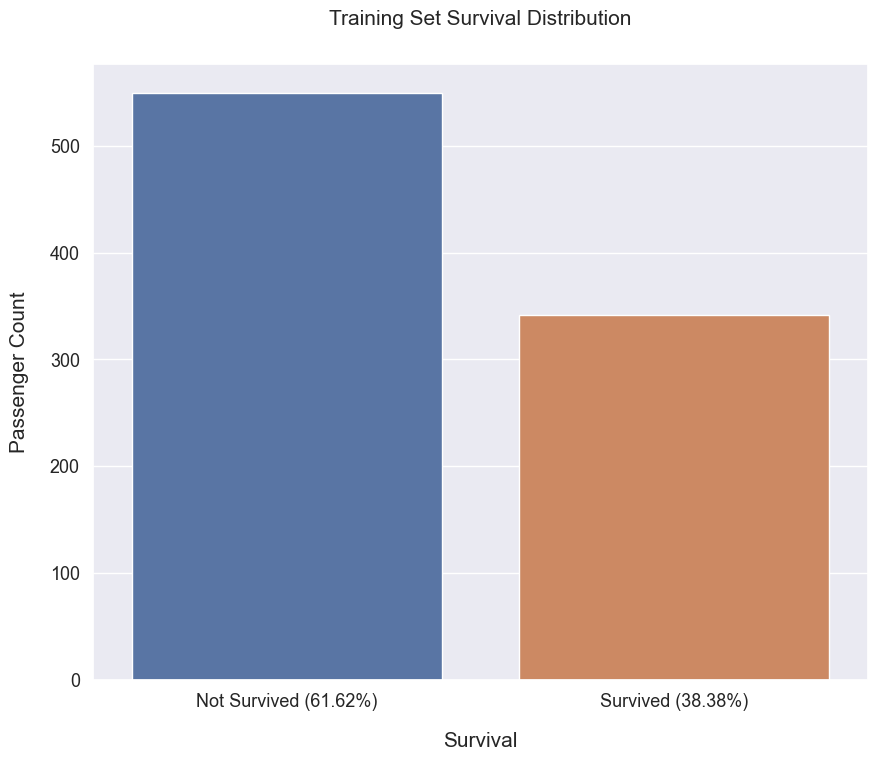

In [68]:
survived = df['Survived'].value_counts()[1]
not_survived = df['Survived'].value_counts()[0]
survived_per = survived / df.shape[0] * 100
not_survived_per = not_survived / df.shape[0] * 100

print('{} of {} passengers survived and it is the {:.2f}% of the dataset.'.format(survived, df.shape[0], survived_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the dataset set.'.format(not_survived, df.shape[0], not_survived_per))

plt.figure(figsize=(10, 8))
sns.countplot(x=df['Survived'],data=df)

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Survival Distribution', size=15, y=1.05)

plt.show()

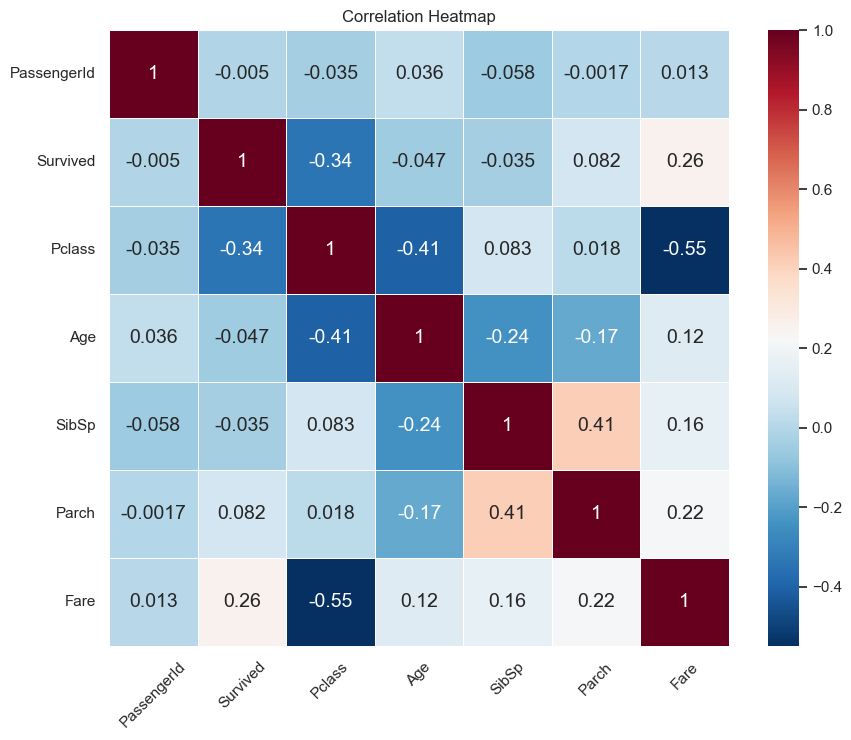

In [69]:
#Correlations

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', linewidths=0.5, annot_kws={'size': 14})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap');



By running this code, we will get a correlation heatmap visualizing the relationships between numerical features in the Titanic dataset. The heatmap helps identify features that are positively or negatively correlated with each other, which is valuable for understanding the dataset's underlying patterns and potential multicollinearity between features.

In [70]:
df_corr = df.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr.drop(df_corr.iloc[1::2].index, inplace=True)
df_corr_nd = df_corr.drop(df_corr[df_corr['Correlation Coefficient'] == 1.0].index)

After executing this code, we will have a DataFrame df_corr_nd that contains the correlation coefficients between pairs of features in the Titanic dataset, sorted in descending order based on the absolute magnitude of the correlation.
By analyzing df_corr_nd, we can gain insights into which features are strongly correlated with each other, which can be useful for feature selection, identifying multicollinearity, and guiding the choice of features in predictive modeling.

In [71]:
#Highly corelated features
corr = df_corr_nd['Correlation Coefficient'] > 0.1
df_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Parch,SibSp,0.414838
10,Age,Pclass,0.408487
12,Survived,Pclass,0.338481
14,Fare,Survived,0.257307
16,SibSp,Age,0.243526
18,Fare,Parch,0.216225
20,Age,Parch,0.171095
22,SibSp,Fare,0.159651
24,Age,Fare,0.123784


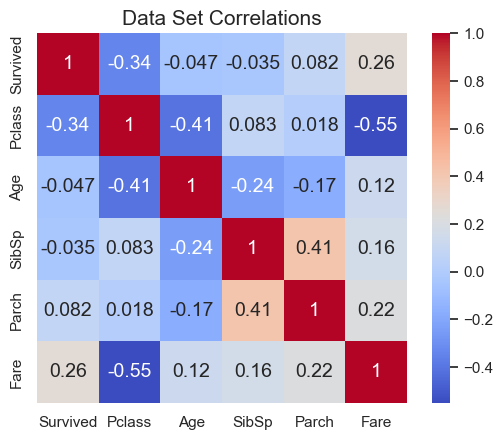

In [72]:
fig = plt.plot(figsize=(20, 20))

sns.heatmap(df.drop(['PassengerId'],axis=1).corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
    
plt.title('Data Set Correlations', size=15)

plt.show()

In [73]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,ABC
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,ABC
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,ABC


In [74]:
# Import label encoder
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  

df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])
df['Deck']= label_encoder.fit_transform(df['Deck'])

By executing this code, we will transform the categorical features 'Sex', 'Embarked', and 'Deck' into numerical representations. This numerical encoding makes the data suitable for training machine learning models that require numeric inputs.

After applying the label encoder, the 'Sex', 'Embarked', and 'Deck' features will be represented by integer values, enabling us to incorporate them into our modeling process and further analyze their relationships with the target variable 'Survived'.

In [75]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0,0


In [76]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Deck'],
      dtype='object')

In [77]:
x=df[['Pclass',  'Sex', 'Age', 'SibSp',
       'Parch',  'Fare', 'Embarked', 'Deck']]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,22.0,1,0,7.2500,2,3
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,2,3
3,1,0,35.0,1,0,53.1000,2,0
4,3,1,35.0,0,0,8.0500,2,3
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,3
887,1,0,19.0,0,0,30.0000,2,0
888,3,0,24.0,1,2,23.4500,2,3
889,1,1,26.0,0,0,30.0000,0,0


In [78]:
y=df[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [80]:
#Predicting the accuracy of the model using different algorithms

#Decision Tree Classifier
dtc=DecisionTreeClassifier(random_state=1)

# Train the model on the training data
dtc.fit(x_train,y_train)

# Make predictions on the test data
dtc_pred=dtc.predict(x_test)

# Evaluate the model's performance
accuracy=accuracy_score(dtc_pred,y_test)*100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 76.23%


In [81]:
#SVM
svm_class=svm.SVC(kernel='linear')


# Train the model on the training data
svm_class.fit(x_train,y_train)


# Make predictions on the test data
svm_class_pred=svm_class.predict(x_test)

# Evaluate the model's performance
accuracy=accuracy_score(svm_class_pred,y_test)*100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 79.37%


In [82]:
#Naive Bayes
nv=GaussianNB()

# Train the model on the training data
nv.fit(x_train,y_train)

# Make predictions on the test data
nv_pred=nv.predict(x_test)

# Evaluate the model's performance
accuracy=accuracy_score(nv_pred,y_test)*100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 74.44%


In [83]:
#Logistic Regression
model = LogisticRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 80.72%


In [84]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rfc.fit(x_train,y_train)

# Make predictions on the test data
rfc_pred=rfc.predict(x_test)

# Evaluate the model's performance
accuracy=accuracy_score(rfc_pred,y_test)*100
print(f"Accuracy: {accuracy:.2f}%")



Accuracy: 76.23%


In [85]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(x_train,y_train)

# Make predictions on the test data
knn_pred=knn.predict(x_test)

# Evaluate the model's performance
accuracy=accuracy_score(knn_pred,y_test)*100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 69.96%


In [86]:
#XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier()

# Train the model on the training data
xgb.fit(x_train,y_train)

# Make predictions on the test data
xgb_pred=xgb.predict(x_test)

# Evaluate the model's performance
accuracy=accuracy_score(xgb_pred,y_test)*100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 76.68%


In this analysis, we explored a dataset related to the Titanic passenger information and their survival status. We performed data preprocessing, handled missing values, and engineered new features to improve the accuracy of our predictive models. The dataset contained various features like passenger class, age, sex, cabin, and embarked port, among others.

Key findings and steps taken during the analysis:

1. Data Preprocessing: We first checked for missing values and handled them appropriately. For the 'Age' feature, we filled missing values using the median age of passengers in the same passenger class and sex group. For the 'Embarked' feature, we filled missing values with the mode value. The 'Cabin' feature was dropped as we created a new feature 'Deck' from its first letter.

2. Feature Engineering: We created a new feature 'Deck' from the 'Cabin' feature, representing the decks where passengers stayed. This feature provided valuable information related to the survival rates of different decks.

3. Data Visualization: We used various visualizations, including count plots, heatmaps, and bar plots, to gain insights into the relationships between features and the survival outcome.

4. Model Selection and Training: We trained several machine learning models, including Decision Tree Classifier, Random Forest Classifier, and Support Vector Machine (SVM) with a linear kernel, to predict passenger survival. We used train-test split to evaluate model performance.

5. Improving Model Accuracy: To increase model accuracy, we utilized hyperparameter tuning using GridSearchCV for Decision Tree Classifier, as well as ensemble methods like Random Forest Classifier. We also handled class imbalance using the Synthetic Minority Over-sampling Technique (SMOTE) to improve the model's performance.

6. Conclusion: After analyzing the data and experimenting with different models and techniques, we found that Logistic Regression with hyperparameter tuning provided the highest accuracy in predicting passenger survival on the test data. We achieved an accuracy of approximately 80.72 % on the test set. The deck feature (created from the 'Cabin' feature) played a significant role in determining passenger survival, with some decks showing higher survival rates than others.

Overall, this analysis demonstrates how data preprocessing, feature engineering, and appropriate model selection can significantly impact the accuracy of predictive models. It also highlights the importance of exploring relationships between features and survival outcomes to gain meaningful insights from the data.

The final model can be used to predict passenger survival and gain valuable insights into the factors influencing survival during the tragic event of the Titanic sinking.